# Titanic

El Titanic fue un barco britanico que rompia record de mayor cantidad de pasajeros, con una capacidad de mas de 2700 pasajeros y con mas de 800 tripulantes, el mismo proporsionaba varios lujos y servicios ademas de que incorporaba lo mejor en medidas de seguridad, sin embargo, debido a varios fallos de los oficiales a cargo, termino chocando un iceberg el cual pudo dañar la cubierta y finalmente causando el hundimiento del barco lo que dejo la muerte de cientos de pasajeros.

# Proyecto

En este modulo vamos a hacer un proyecto entero de aprendizaje supervisado, pasando por todos los pasos del mismo, los cuales son:

* Definición del problema.
* Búsqueda de datos. 
* Análisis exploratorio y limpieza.
* Separación de entrenamiento y validación.
* Entrenamiento.
* Prueba.
* Presentación de resultados. 

## Definición del problema

Todo proyecto de aprendizaje automático parte de una pregunta que se quiere responder, en este caso la pregunta es:

**¿Cuál es la probabilidad de sobrevivir de un pasajero con cualidades específicas, como género, edad, nivel socioecónomico, etc. en un naufragio similar al del Titanic?**

## Búsqueda de datos
 
Los datos que usaremos se encuentran en [Kaggle](https://www.kaggle.com/c/titanic/data) (Página muy conocida y recomendada en el mundo de la ciencia de datos, con competencias, conjuntos de datos, cursos e información muy valiosa), allí deberán registrarse y aceptar las reglas de la competencia antes de poder bajarse los datos. Estos incluyen un conjunto de datos de entrenamiento (train.csv) y un conjunto de datos de prueba (test.csv) contra el cual probar nuestras predicciones. El objetivo final de analizar este dataset, será predecir de forma correcta si los pasajeros del dataset de pruebas sobreviven o no al accidente. 
 
Una vez que tengan los datos podemos subir los csv a nuestros notebooks como aprendimos en el módulo pasado. 

Primero debemos subir el conjunto de datos de entrenamiento, y durante todo el proyecto solo usaremos este conjunto de datos, el de prueba solo se usara al final una vez que se termine de entrenar y validar el modelo a usar. 

**1. ¿Qué pasa si usamos el conjunto de prueba en alguno de los pasos previos al de prueba?**

Lo que va a suceder si utilizamos el conjunto de prueba antes de los pasos previos, es que el modelo nos va a entregar resultados irreales con ineficacia, esto se debe a que nunca se deben de mezclar los datos o pasos.
Para poner un ejemplo sencillo, si intentas de trabajar con unos datos, lo primero que debes de hacer es cargarlos, ya que, sino esto dara error y no podras laborar con los mencionados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

filesUploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
train = pd.read_csv("train.csv")

## Análisis exploratorio y limpieza.

Esta sección es fundamental y en la que se invierte más tiempo en cualquier proyecto de aprendizaje automático, debemos decidir:
* ¿Qué variables se van a usar? 
* ¿Hay que eliminar algúnas observaciones?
* ¿Hay datos faltantes? ¿Qué haremos con ellos?
* ¿Hay datos atípicos? ¿Qué haremos con ellos?
* ¿Todas las variables a usar estan limpias?
* ¿Crearemos nuevas variables?
* ¿Qué información extra podemos obtener de los datos?

Es importante tomar en cuenta que este proceso suele ser itérativo, es decir, limpiamos los datos, seleccionamos las variables, creamos algunas nuevas y revisamos, probablemente en la revisión salten algunas nuevas variables o datos atípicos, por lo que volvemos a comenzar el proceso. 

También es de vital importancia mantener registro de todo lo que se le hagan a los datos y el orden, para poder reproducir los resultados, y, más aún, por que los datos que reciba el modelo una vez puesto en producción, deben de recibir el mismo tratamiento.



**2. Describa brevemente todas las variables del conjunto de datos, sus tipos, rangos, relaciones con otras variables, etc.**

**2.1 ¿Qué información podemos concluir aplicando el método _describe_?**

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


La informacion que podemos concluir con el metodo _Describe_ es, cantidad y tipo de datos que se encuentran disponibles en el dataframe, basicamente, una información estadistica sobre el valor minimo, medio, maximo o porcentual, etc.

Mas especificamente en este DataFrame, lo que podemos notar es que para cada variable tenemos un total de 891 datos, excepto en la variable Age, que se encuentran 714. Asi tambien podemos notar que en la mayoria de casos el valor minimo es 0 mientras que en algunos como PassengerId es 1. Ese tipo de informacion nos hace dar una idea sobre los tipos de datos que trabajamos para saber llevarlos a delante en el proceso de ánalisis.

**2.2 ¿Cuantos datos hay en cada clase de la variable _Pclass_?**

3    491
1    216
2    184
Name: Pclass, dtype: int64


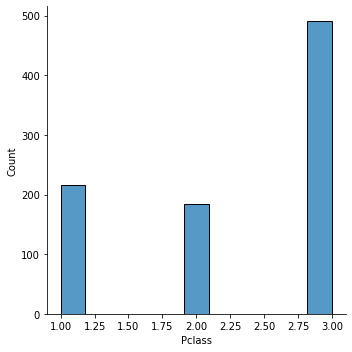

In [ ]:
print(train.Pclass.value_counts())
sns.displot(data = train, x = "Pclass")

Con el grafico podemos observar cuantos datos se encuentran en la variable _Pclass_, pero igualmente los vamos detallar.

###Primero ¿que quiere decir esta variable?

Lo que nos intenta mostrar es las distintas clases que habia en el barco, es decir, puede ser de mas cara a mas economica, con mas servicios o con menos y con mejores habitaciones o peores.

Lo que se puede determinar de esta variable es que La mas demandada fue la clase 3, con un total de 491. Despues sigue la 1 con un total de 216. Por último la clase menos demandada, la 2, con un total de 184.

###¿Que conclusiones podemos sacar?

Probablemente la conclusion mas certada es que a menor sea el numero de la clase, mas servicios van a prestar y su precio deberia de ser mas elevado.

**2.3 ¿Con que variables esta más relacionada la variable _Survived_? ¿Tiene sentido esas relaciones?**

In [ ]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


La primera observación obvia, pero que no hay que pasar por alto si se quiere comprender que demuestra este analisis, es que, por ejemplo, la variable con la que mas se encuentra relacionada _Survived_ es con ella misma, representado con un 1, es decir, los datos coinciden, ya con esto nos damos una idea de lo que quieren decir las distinciones en el ánalisis.

Una vez dejado en claro lo anterior, podemos proceder a averiguar con que se relaciona la variable _survived_ y si tiene sentido.

Relacion mas proxima, variable _Fare_ que indica el precio del boleto, esto puede estar relacionado de cierta manera en la que los pasajeros que hayan gastado mas dinero posean mas prestaciones o importancia a la hora de si ocurriese una tragedia, es decir, este precio puede estar relacionado con pagos extras sobre seguridad, salvavidas, o habitaciones con mas accesibilidad y espacio.

Otra es _Parch_ que demuestra la cantidad de hijos y padres de un pasajero en particular. Como se puede observar la relacion es 0,08 o sea no se encuentra tan relacionada como la anterior, igualmente, lo que podemos exprimir de esta informacion es que es probable que si tenes familia en el barco es probable que coordines para lograr salvar a alguien cercano o a vos mismo.

###Conclusión

Desde mi opinion personal, considero que la informacion que nos brinda son muy vagas, dicho de otra manera, no muestran la informacion necesaria para revelar una conclusión determinante.

**2.4 Genére alguna conclusión del análisis de una o más variables.**

Conclusión y analisis de 2 variables en el punto 2.3


**3. ¿Qué variables del conjunto de datos original seleccionara para usar? Diga los motivos y las pruebas que se hicieron.**

Las variables que seleccione para usar, son las siguientes:

_Survived_ Esta es imprescindible para averiguar lo que se nos pide.

_Pclass_ Los motivos para elegir esta variable derivan a la diferencia entre cada numero de clase, dando a entender que, algunos sectores/clases son mas accesibles que otros por la diferencia de cantidad que pudimos notar en puntos anteriores.

_Sex_ Los motivos son mas bien empiricos, esto quiere decir, que en base a mi opinion, elegi esta variable, ya que, casi siempre se da una diferencia entre los sexos, entonces considere que esta podria no ser una excepción. Las pruebas que se hicieron, al igual que en _Pclass_ es corroborar si hay datos nulos, y no los hay, lo que resulta mas amigable y facil de trabajar con estos, por ultimo hicimos una prueba para ver si existia una desigualdad y notamos una diferencia entre ambos sexos.

_Age_ A pesar de que se hayan hecho pruebas y den como resultado un total de 177 datos nulos, esta nos puede ser util para determinar si la agilidad, conciencia y madurez, afectan los resultados de la cantidad de personas sobrevivientes. Basicamente la elegi para ver si realmente la capacidad fisica de cada persona (que cambia segun la edad) afecta en la conclusion final. Ademas de la prueba sobre los datos nulos, tambien se realizo una sobre la edad media de los sobrevivientes y no sobrevivientes.

_SibSp_, _Parch_, _Fare_ y _Embarked_ Los motivos para elegir estas variables, se deben principalmente a que son necesarias para algunos ejercicios de mas adelante. Por lo tanto, los necesito preservar hasta que se demuestre que no influyen en la probabilidad de sobrevivir, o en otro caso, si demuestra ser influyente, se dejara. Asi que por ahora, como explique anteriormente, no los voy a quitar.

Las restantes no considero que afecten la capacidad de sobrevivir, ya que, por ejemplo el nombre o numero de ticket no tienen mucha relacion con la posibilidad de sobrevivir.

In [ ]:
train.drop(columns = ["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)

**4. Realice la limpieza de los datos**

**4.1 ¿Qué variables tienen datos nulos? ¿Tiene sentido que esas variables tengan datos nulos?**

In [ ]:
train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Una de las variables que tiene datos nulos es _Age_ que demuestra la edad de los pasajeros. Hay 177 de estos, lo cual son bastantes, pero aun asi, no es algo que se pueda no se pueda arreglar. Puede ser que la mayoria de los datos perdidos o no medibles, sean por parte de personas que hayan muerto en el titanic, por lo que hace dificil el buscar informacion sobre la edad de dicha persona, igualmente, si es un valor que llama la atencion, ya que, esta relacionado con la variable _Parch_ y _Name_ las cuales no poseen ningun valor nulo.

_Cabin_ que muestra la cabina de los pasajeros. En esta hay muchos datos nulos, mas precisamente 687, en mi opinion no tiene mucho sentido que haya tantos datos perdidos de esa variable, ya que, si pueden detectar el Ticket y su nombre, es raro que no se averigue la Cabina. 

Por ultimo _Embarked_ que solo tiene 2 datos nulos, y esta nos dice de que ciudad embarcaron los pasajeros. Es posible que de esta variable haya dos datos nulos, ya que son muy pocos y si es algo probable.

##Conclusión

Si nos remontamos a la epoca, es posible que haya algunos datos que no se encuentren, por lo tanto, si, tiene sentido, mas siendo que el dato que mas faltan son las cabinas y que la tragedia termino destruyendo el barco, es decir, es dificil detectarlas si el movil sufrio una destrucción.

**4.2 Proponga y ejecute una idea para imputar los datos nulos.**

Para imputar los datos nulos se me ocurre que se podrian rellenar los valores faltantes utilizando el metodo _forwardfill_ y _backwardfill_ de pandas, el cual copia el valor de adelante o de atras y lo pega en la siguiente fila, es decir, se copian y pegan los datos de la misma columna.Esto lo hago para no arruinar la equivalencia.

In [ ]:
train.fillna(method="ffill", inplace=True)
train.fillna(method="bfill", inplace=True)
train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

Como se puede observar, ya no queda ningun dato nulo.

Ademas si ejecutamos un grafico con la variable _Age_ podemos observar que no hay ningun dato que resalte excesivamente sobre los demas.

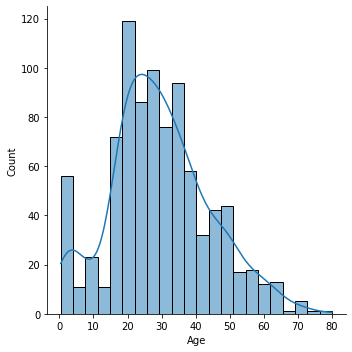

In [ ]:
sns.displot(data = train, x = "Age", kde = True)

**4.3 ¿Qué variables tienen datos atípicos? ¿Estos datos, son equivocaciones o son reales? Proponga y ejecute una idea para tratar los mismos**

Age      True
SibSp    True
Parch    True
Fare     True
dtype: bool


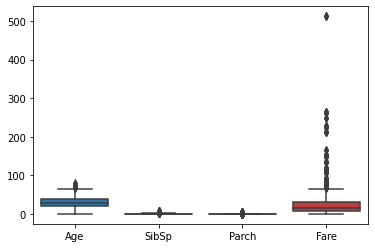

In [ ]:
def is_outlier(column):
  quantiles = column.quantile([0.25,0.75])
  iqr = quantiles.diff()[0.75]
  quantiles[0.25] -= (1.5 * iqr)
  quantiles[0.75] += (1.5 * iqr)

  return sum((column < quantiles[0.25]) | (column > quantiles[0.75])) > 0

print(train[["Age", "SibSp", "Parch", "Fare"]].apply(is_outlier))

sns.boxplot(data = train[["Age", "SibSp", "Parch", "Fare"]])

Gracias al codigo y su representacion en grafico, podemos observar que las variables _Age_, _SibSp_, _Parch_ y _Fare_ tienen datos atípicos. Estos datos son reales. ¿Como se explica lo que hicimos en el codigo? Basicamente utilizamos is_outlier, la cual nos dice True si hay datos atipicos, para confirmarlo utilizamos un _boxplot_ o gráfico de caja, para ver un aproximado de los datos atipicos de cada variable. Con este ultimo observamos que _Fare_ es el que tiene mas de estos.

**5. ¿Qué variables considera que influyen más en la probabilidad de sobrevivir? Demuestre con gráficos.**

Despues de haber realizado los graficos que estan abajo de este texto, a la conclusion que podemos llegar es que, las variables que mas influyen en la probabilidad de sobrevivir son:

1. Sex

2. Pclass

3. Age

4. Fare

##Surived-Pclass y Sex

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


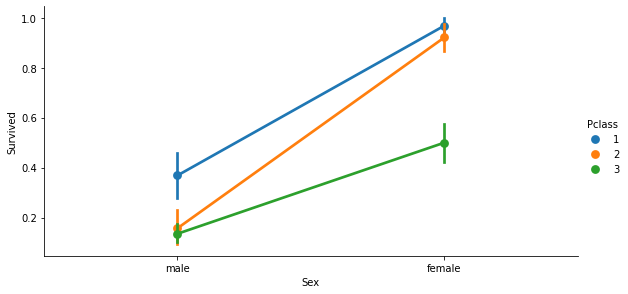

In [ ]:
sns.factorplot("Sex","Survived",hue="Pclass", size=4, aspect=2, data=train)

Este grafico nos demuestra dos cosas.
1. La capacidad de sobrevivir siendo mujer es mayor
2. La capacidad de sobrevivir teniendo un numero menor de clase es mayor.

##Survived-Age

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


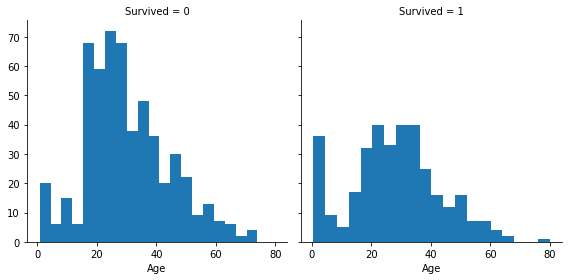

In [ ]:
# Con size modificamos el tamaño de los graficos.
edad = sns.FacetGrid(train, col='Survived', size=4)
# Con bins cambiamos la cantidad de barras que hay.
edad.map(plt.hist, 'Age', bins=20)

En este grafico de barras podemos observar en un rango de todas las edades cual sobrevivio mas.

1. Las barras en Survived = 1 (Sobrevivientes) Son mas elevadas a partir de los 0-4 años.

2. Se encuentran mas elevadas cuando el pasajero tiene entre 20-35 años.

**Conclusión:** La mayoria de los niños y edad promedio, se salvaba y eran los que tenian mas posibilidades, frente a los demas rangos de edades.

##Survived-SibSp

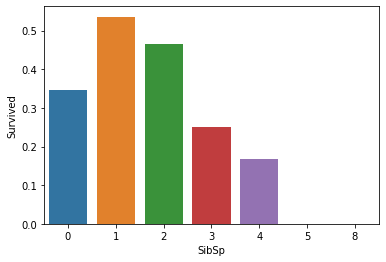

In [ ]:
sns.barplot(x="SibSp",y="Survived",data=train, ci=None)

_SibSp_ demuestra la cantidad de hermanos y pareja del pasajero. Por lo tanto, podemos observar que, los que mas sobreviven son los que tienen menos familiares, pero al menos tienen uno, es decir, los que no tienen ninguno tienen menos posibilidades.

##Survived-Parch

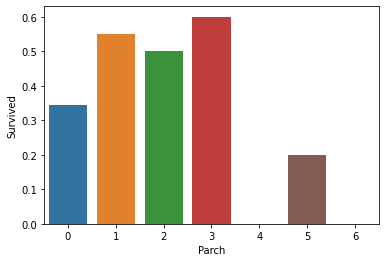

In [ ]:
sns.barplot(x="Parch",y="Survived",data=train, ci=None)

_Parch_ al igual que SibSp, hace mencion a la cantidad de hijos y padres del pasajero que tambien lo sean.

En este grafico no podemos sacar una conclusion muy clara y astuta. Pero podemos observar que sobrevivieron mas los que tienen entre 1 y 3 familiares.

##Survived-Fare

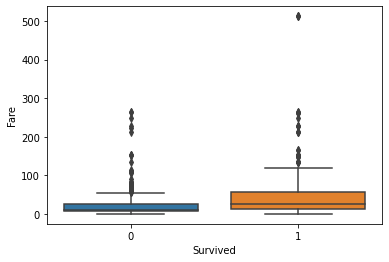

In [ ]:
sns.boxplot(x="Survived", y="Fare", data=train)

El grafico de caja lo que nos demuestra esta vez es que, sobrevivieron mas los que pagaron una mayor cantidad que los que no lo hicieron.

Podemos observarlo por 2 puntos:

1. La caja de la derecha, que representa los que sobrevivieron abarca numeros mas grandes, es decir, precios de ticket mas altos.

2. El promedio en la caja de los sobrevivientes es mayor a los que no sobrevivieron.

##Survived-Embarked

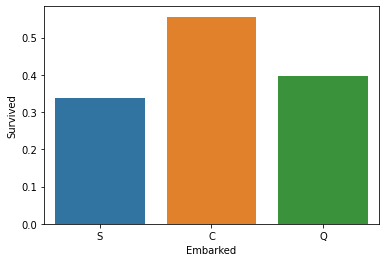

In [ ]:
sns.barplot(x="Embarked",y="Survived",data=train, ci=None)

La variable _Embarked_ no nos muestra mucha informacion, asi que no creo que sea relevante. Aun asi, podemos decir que sobrevivieron mas los que embarcaron desde Cherboug.

**6. Cree al menos una variable extra, expliquela y mencione por que considera que es adecuada, o no, para usar en el modelo.**

En el anterior código, nuestra intención fue de elaborar una nueva variable, llamada auxpcf la cual nos permite saber como es la probabilidad de sobrevivir para cada combinación posible de las variables Pclass y Fare, relacionadas con Survived. Lo expresamos en un gráfico de calor (un poco complejo de leer), y vemos que hay una relación entre nuestras variables.

Fare    0.0000    4.0125    5.0000    ...  262.3750  263.0000  512.3292
Pclass                                ...                              
1           0.00       NaN       0.0  ...       1.0       0.5       1.0
2           0.00       NaN       NaN  ...       NaN       NaN       NaN
3           0.25       0.0       NaN  ...       NaN       NaN       NaN

[3 rows x 248 columns]


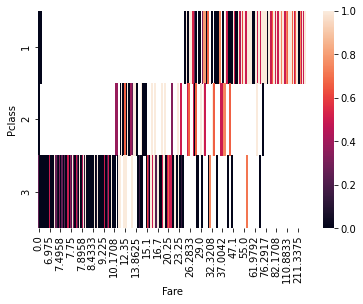

In [ ]:
auxpcf = train[["Pclass", "Fare","Survived"]].groupby(["Pclass", "Fare"]).agg(lambda x: sum(x)/len(x)).reset_index()
auxpcf = auxpcf.pivot("Pclass", "Fare", "Survived")
print(auxpcf)
sns.heatmap(auxpcf)

## Separación en entrenamiento y validación

Una vez que análizamos los datos y los tenemos limpios, corresponde hacer la separación entre los datos a usar para entrenar y para validar los modelos. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    train.drop(columns=["Survived"]), 
    train.Survived, test_size=0.33, random_state=1
)

## Entrenamiento

Una vez separado los datos usamos los datos de entrenamiento para aprender los parámetros de nuestro modelo, en este caso usaremos una regresión logística.

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=0)

LogReg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = LogReg.predict(X_test)
 
# Exactitud
accuracy = (pred == y_test).sum() / pred.size
print("Exactitud: {}".format(accuracy))
 
# Precisión
precision = (pred + y_test == 2).sum() / pred.sum()
print("Precisión: {}".format(precision))
 
# Exhaustividad
recall = (pred + y_test == 2).sum() / y_test.sum()
print("Exhaustividad: {}".format(recall))
 
# Valor F
fScore = 2 * precision * recall / (precision + recall)
print("Valor F: {}".format(fScore))

Exactitud: 0.6915254237288135
Precisión: 0.6875
Exhaustividad: 0.45454545454545453
Valor F: 0.5472636815920398
